In [1]:
# Link to Dataset: https://www.kaggle.com/datasets/swatikhedekar/car-price-prediction

In [2]:
#pip install imbalanced-learn

In [1]:
# Importing necessary modules ... 
import os
import re
import warnings
import imblearn


import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 

warnings.filterwarnings('ignore')

In [2]:
# Reading dataset
df = pd.read_csv('true_car_listings.csv')

In [3]:
df.head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


## Pre-Processing

In [5]:
# Dropping "Vin" variable - since it is irrelevant for using further in the analysis
df = df.drop(['Vin'], axis = 1)

In [6]:
# Creating "Current_Year" variable. 
df["Current Year"] = 2023

In [7]:
# Calculating/Creating "Age" variable using "Current_Year" variable.
df["Age"] = df["Current Year"] - df["Year"]

In [8]:
outcome = df["Price"]

In [9]:
# Temporarily removing outcome variable and dropping additional variables that won't be needed.
df = df.drop(columns = ["Year", "Current Year","State","City","Make"], axis = 1)

In [10]:
df.head(10)

,Price,Mileage,Model,Age
0,8995,35725,ILX6-Speed,9
1,10888,19606,ILX5-Speed,10
2,8995,48851,ILX6-Speed,10
3,10999,39922,ILX5-Speed,9
4,14799,22142,ILXAutomatic,7
5,7989,105246,TSXAutomatic,11
6,14490,34032,TSXSpecial,9
7,13995,32384,TSX5-Speed,10
8,10495,57596,ILX6-Speed,10
9,9995,63887,ILX5-Speed,10


## Checking Distribution of Numerical Variables

count    852122.000000
mean      21464.100210
std       13596.202241
min        1500.000000
25%       13000.000000
50%       18500.000000
75%       26995.000000
max      499500.000000
Name: Price, dtype: float64




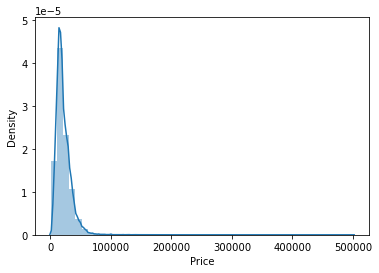

In [11]:
# Checking distribution of "Price" variable 
print(df['Price'].describe()) 
print('\n') 
ax = sns.distplot(df['Price']) 
plt.show()

count    8.521220e+05
mean     5.250779e+04
std      4.198896e+04
min      5.000000e+00
25%      2.383600e+04
50%      4.025600e+04
75%      7.218600e+04
max      2.856196e+06
Name: Mileage, dtype: float64




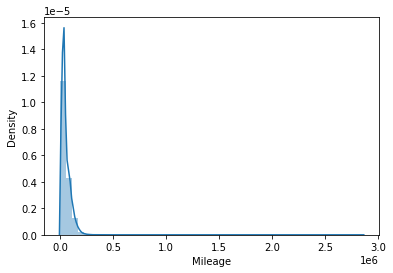

In [12]:
# Checking distribution of "Mileage" variable 
print(df['Mileage'].describe()) 
print('\n') 
ax = sns.distplot(df['Mileage']) 
plt.show()

count    852122.000000
mean          9.710855
std           3.414987
min           5.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          26.000000
Name: Age, dtype: float64




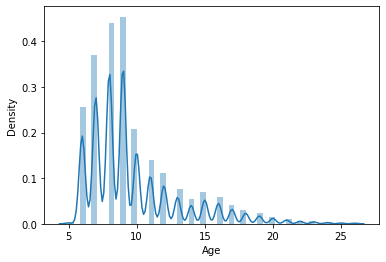

In [13]:
# Checking distribution of "Age" variable 
print(df['Age'].describe()) 
print('\n') 
ax = sns.distplot(df['Age']) 
plt.show()

## Standardizing

In [14]:
# Extracting numerical variables
numerical_var = list((df.select_dtypes(exclude = 'object').columns))

# Creating a column with specialized names for standardized values
new_col = [i + '_standardized' for i in numerical_var] 

# Converting to numpy array
array = df[numerical_var].values 

# Creating standarization instance
data_scaler = StandardScaler().fit(array) 

# Standardizing the numerical variables
data_rescaled = pd.DataFrame(data_scaler.transform(array), columns = new_col)

# Removing columns with un-standardized values
df = df.drop(numerical_var, axis = 1)

# Adding column with standardized values back to original dataset
df = pd.concat([df, data_rescaled], axis = 1)

In [15]:
# Adding back "Price" outcome variable to dataset.
df["Price"] = outcome

In [16]:
df.head(10)

,Model,Price_standardized,Mileage_standardized,Age_standardized,Price
0,ILX6-Speed,-0.917102,-0.399696,-0.208158,8995
1,ILX5-Speed,-0.777872,-0.783582,0.084670,10888
2,ILX6-Speed,-0.917102,-0.087089,0.084670,8995
3,ILX5-Speed,-0.769708,-0.299741,-0.208158,10999
4,ILXAutomatic,-0.490218,-0.723186,-0.793812,14799
5,TSXAutomatic,-0.991094,1.256002,0.377497,7989
6,TSXSpecial,-0.512945,-0.440016,-0.208158,14490
7,TSX5-Speed,-0.549352,-0.479264,0.084670,13995
8,ILX6-Speed,-0.806777,0.121180,0.084670,10495
9,ILX5-Speed,-0.843552,0.271005,0.084670,9995


## Encoding Categorical Variables

In [17]:
# Extracting categorical variables
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['Price']))

In [18]:
# Creating dummy variables using onehot encoding
dummy_cat_df = pd.get_dummies(df[categorical_var]) 

In [19]:
dummy_cat_df.head(10)

,Model_1,Model_124,Model_1500,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,",Model_1500HFE,"Model_1500HFE,",...,Model_xA4dr,Model_xB5dr,Model_xB686,Model_xBAutomatic,Model_xBBase,Model_xBManual,Model_xD,Model_xD5dr,Model_xDAutomatic,Model_xDManual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Dropping categorical variables from the dataset
df = df.drop(categorical_var, axis = 1) 

# Adding the newly created dummy variables 
df = pd.concat([df, dummy_cat_df], axis = 1) 

In [21]:
df.head(10)

,Price_standardized,Mileage_standardized,Age_standardized,Price,Model_1,Model_124,Model_1500,Model_15002WD,Model_15004WD,Model_1500Big,...,Model_xA4dr,Model_xB5dr,Model_xB686,Model_xBAutomatic,Model_xBBase,Model_xBManual,Model_xD,Model_xD5dr,Model_xDAutomatic,Model_xDManual
0,-0.917102,-0.399696,-0.208158,8995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.777872,-0.783582,0.084670,10888,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.917102,-0.087089,0.084670,8995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.769708,-0.299741,-0.208158,10999,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.490218,-0.723186,-0.793812,14799,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.991094,1.256002,0.377497,7989,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.512945,-0.440016,-0.208158,14490,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-0.549352,-0.479264,0.084670,13995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-0.806777,0.121180,0.084670,10495,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-0.843552,0.271005,0.084670,9995,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Assessing Variables' Relationships

In [ ]:
# Assessing relationships through pairplot
sns.pairplot(df)
plt.show()

In [ ]:
# Assessing correlation through correlation matrix
corr = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr.corr(), annot = True, cmap = "RdYlGn")
plt.show()

## Balancing Dataset

In [22]:
# Assessing class imbalance for "Price" variable
df['Price'].value_counts()

14995    4898
12995    4600
13995    4591
9995     4298
15995    4282
         ... 
53385       1
52277       1
64521       1
45506       1
60240       1
Name: Price, Length: 47124, dtype: int64

In [23]:
os = SMOTE(random_state = 0) 

input_var = list(set(df.columns) - set(['Price'])) 

X, Y = os.fit_resample(df[df.columns.difference(['Price'])], df['Price']) 
X = pd.DataFrame(X, columns = input_var) 
Y = pd.DataFrame(Y, columns = ['Price']) 

df = pd.concat([X, Y], axis = 1) 

MemoryError: Unable to allocate 17.4 GiB for an array with shape (2739, 852122) and data type float64

In [ ]:
df['Price'].value_counts()

In [ ]:
# Saving the processed dataset
df.to_csv('car_data_processed.csv', index = False)

## Fitting Models

In [ ]:
# Reading the processed dataset
df = pd.read_csv('car_data_processed.csv') 

# Extracting input variables
input_var  = set(df.columns) - set(['Owner_Status'])

X = df[input_var]
Y = df['Owner_Status']

In [ ]:
# Models to be built
models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [ ]:
# Linear Regression Model ...
model = LinearRegression()
model.fit(X, Y) 
model.coef_

In [ ]:
# Logistic Regression Model ...
lr = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train, Y_train)

In [ ]:
# Decision Trees Model ...
dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 15)
dt.fit(X_train, Y_train)

In [ ]:
# Random Forests Model ...
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 0)
rf.fit(X_train, Y_train)

In [ ]:
# K-NN Model ...
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

## Predictions & Model Assessment

### Accuracy, Sensitivity, Specificity ...

In [ ]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    return accuracy, sensitivity, specificity

In [ ]:
# Predicts "Y" given the ... 

# Fitted Logisitic Regression Model
pred_Y_lr = lr.predict(X_test) 

# Fitted Decision Trees Model
pred_Y_dt = dt.predict(X_test) 

# Fitted Random Forests Model
pred_Y_rf = rf.predict(X_test) 

# Fitted K-NN Model
pred_Y_knn = knn.predict(X_test) 

In [ ]:
# Accuracy, Sensitivity, & Specificity for ...

# Logistic Regression Model
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

# Decision Trees Model
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)

# Random Forests Model
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# K-NN Model
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [ ]:
# Building dataframe for model comparison
perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

### Area Under Curve (AUC) ...

In [ ]:
# Logistic Regression Model ...
score_Y_dt = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# Decision Trees Model ...
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees Model')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# Random Forests Model ...
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forests Model')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
# K-NN Model ...
score_Y_dt = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-NN Model')
plt.legend(loc = "lower right")
plt.show()